In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [2]:
def load_images_from_folder(folder, img_size=(96,96)):
    images = []
    for filename in os.listdir(folder):
        path = os.path.join(folder, filename)
        img = load_img(path, target_size=img_size)
        img = img_to_array(img) / 255.0  # normalizar
        images.append(img)
    return np.array(images)

In [3]:
base_path = ''  ###
X = load_images_from_folder(os.path.join(base_path, 'images_original'))
Y = load_images_from_folder(os.path.join(base_path, 'images_clean'))
#X_test = load_images_from_folder(os.path.join(base_path, 'images_test'))

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Train shape: {X_train.shape}, Validation shape: {X_val.shape}')


Train shape: (560, 96, 96, 3), Validation shape: (140, 96, 96, 3)


In [28]:

input_img = Input(shape=(96, 96, 3))  # Nueva entrada

# ===== Codificador =====
x = Conv2D(16, (3, 3), activation='sigmoid', padding='same')(input_img)      # 512x512x32
x = MaxPooling2D((2, 2), padding='same')(x)                                # 256x256x32

x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)              # 256x256x64
x = MaxPooling2D((2, 2), padding='same')(x)                                # 256x256x32

x = Conv2D(64, (3, 3), activation='sigmoid', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x)                                # 128x128x64

x = Conv2D(128, (3, 3), activation='sigmoid', padding='same')(x)             # 128x128x128
x = MaxPooling2D((2, 2), padding='same')(x)                                # 64x64x128

x = Conv2D(256, (3, 3), activation='sigmoid', padding='same')(x)             # 64x64x256            # 16x16x512             # 64x64x256            # 16x16x512
encoded = MaxPooling2D((2, 2), padding='same')(x) 

# ===== Decodificador =====                                          # 32x32x256
x = Conv2D(256, (3, 3), activation='sigmoid', padding='same')(encoded)             # 32x32x128
x = UpSampling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='sigmoid', padding='same')(x)             # 32x32x128
x = UpSampling2D((2, 2))(x)                                                # 64x64x128

x = Conv2D(64, (3, 3), activation='sigmoid', padding='same')(x)              # 64x64x64
x = UpSampling2D((2, 2))(x)                                                # 128x128x64

x = Conv2D(32, (3, 3), activation='sigmoid', padding='same')(x)             # 128x128x32
x = UpSampling2D((2, 2))(x)  

x = Conv2D(16, (3, 3), activation='sigmoid', padding='same')(x)             # 128x128x32
x = UpSampling2D((2, 2))(x)  

# Capa de salida
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)      # 512x512x3

# Modelo autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
autoencoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_77 (Conv2D)                   │ (None, 96, 96, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 48, 48, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 48, 48, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_35 (UpSampling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 6, 6, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_36 (UpSampling2D)      │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 12, 12, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_37 (UpSampling2D)      │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_85 (Conv2D)                   │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_38 (UpSampling2D)      │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_86 (Conv2D)                   │ (None, 48, 48, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_39 (UpSampling2D)      │ (None, 96, 96, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,375,043 (5.25 MB)

 Trainable params: 1,375,043 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
augmenter = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# X_train: imágenes ruidosas, Y_train: imágenes limpias
batch_size = 16

# Crear generadores sincronizados para (X, Y)
train_generator = augmenter.flow(X_train, batch_size=batch_size, seed=42)
target_generator = augmenter.flow(Y_train, batch_size=batch_size, seed=42)

# Generador combinado: entrega pares (X_aug, Y_aug)
def combined_generator(gen1, gen2):
    while True:
        yield next(gen1), next(gen2)

augmented_data = combined_generator(train_generator, target_generator)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento con imágenes aumentadas
autoencoder.fit(
    augmented_data,
    steps_per_epoch=len(X_train) // batch_size,
    validation_data=(X_val, Y_val),
    epochs=50,
    callbacks=[early_stop]
)

# Supongamos que tu modelo se llama `autoencoder`
autoencoder.save("autoencoder_planttraits.keras")  # formato recomendado
# O bien en formato HDF5:
# autoencoder.save("autoencoder_planttraits.h5")


Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.1986 - val_loss: 0.1395
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.1270 - val_loss: 0.1005
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.0929 - val_loss: 0.0816
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0752 - val_loss: 0.0733
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0681 - val_loss: 0.0696
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0646 - val_loss: 0.0677
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0658 - val_loss: 0.0667
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0613 - val_loss: 0.0661
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0620 - val_loss: 0.0658
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0624 - val_loss: 0.0656
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0636 - val_loss: 0.0655
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


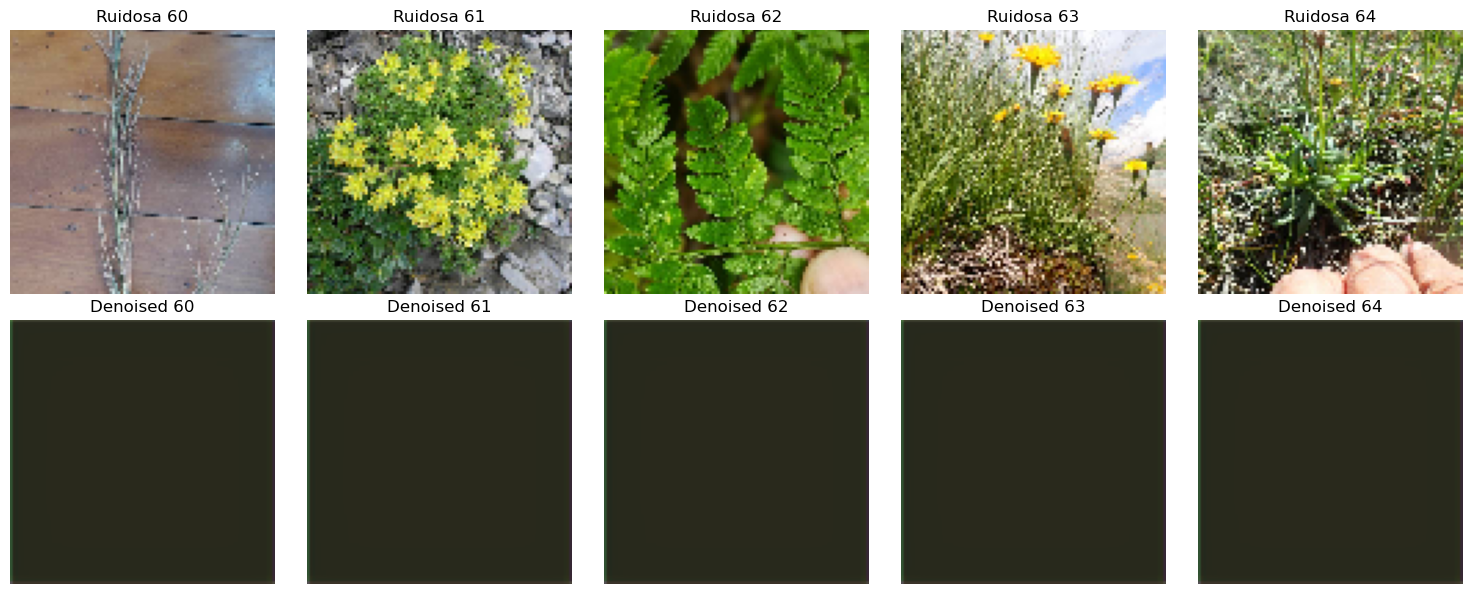

In [30]:

start_index = 60

X_test = load_images_from_folder(os.path.join(base_path, 'images_test'), img_size=(96,96))
X_denoised = autoencoder.predict(X_test)

# Mostrar comparativa: ruidosa vs reconstruida
n = 5  # número de imágenes a mostrar
plt.figure(figsize=(15, 6))
for i in range(n):
    idx = start_index + i
    if idx >= len(X_test):
        break
    ax = plt.subplot(2, n, i + 1)  # Imagen ruidosa
    plt.imshow(X_test[idx])
    plt.title(f"Ruidosa {idx}")
    plt.axis("off")
    ax = plt.subplot(2, n, i + 1 + n)  # Imagen denoised
    plt.imshow(X_denoised[idx])
    plt.title(f"Denoised {idx}")
    plt.axis("off")

plt.tight_layout()
plt.show()



In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np

Y_test = load_images_from_folder(os.path.join(base_path, 'images_clean'))
Y_denoised = autoencoder.predict(Y_test)

mse_values = [mean_squared_error(x_true.flatten(), x_pred.flatten())
              for x_true, x_pred in zip(Y_test, Y_denoised)]

print(f"MSE promedio en prueba: {np.mean(mse_values):.4f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
MSE promedio en prueba: 0.0394


In [8]:
import cv2

def psnr(img1, img2):
    return cv2.PSNR((img1 * 255).astype(np.uint8), (img2 * 255).astype(np.uint8))

psnr_values = [psnr(x_true, x_pred) for x_true, x_pred in zip(Y_test, Y_denoised)]
print(f"PSNR promedio: {np.mean(psnr_values):.2f} dB")

PSNR promedio: 14.84 dB


In [9]:
from skimage.metrics import structural_similarity as ssim

def compute_ssim(y_true, y_pred):
    return ssim((y_true * 255).astype('uint8'), (y_pred * 255).astype('uint8'), channel_axis=2)

ssim_val = np.mean([compute_ssim(y, yp) for y, yp in zip(Y_test, Y_denoised)])
print(f"SSIM promedio: {np.mean(ssim_val):.2f}")

SSIM promedio: 0.15
